# Title: Car Acceptability 

**Assignment 1 Set2**
**Group 67:**
> 1. Hemendra Lakshmana Kumar A 2019HC04383
> 2. Rohit Kumar Verma 2019HC04386
> 3. K Vinod Kumar  2019HC04381

**Car Evaluation Database** - is a study of classification of Cars condition based on multiple attributes

## Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from numpy import mean, std

### 1. Load the data file
The data need to be converted into the below format<br>
buying, maint, doors, persons, lug_boot, safety, cond_class <br>
[vhigh,low,4,more,small,med,unacc]

In [2]:
url1 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
car_data = pd.read_csv(url1,sep=',')
car_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'cond_class']
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,cond_class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### 2. Check if there any data anomalies and visualize

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   buying      1727 non-null   object
 1   maint       1727 non-null   object
 2   doors       1727 non-null   object
 3   persons     1727 non-null   object
 4   lug_boot    1727 non-null   object
 5   safety      1727 non-null   object
 6   cond_class  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


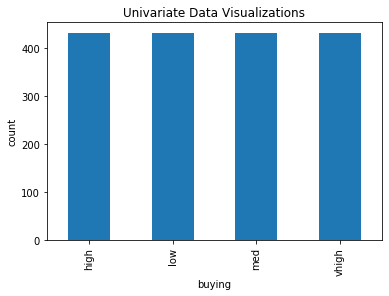

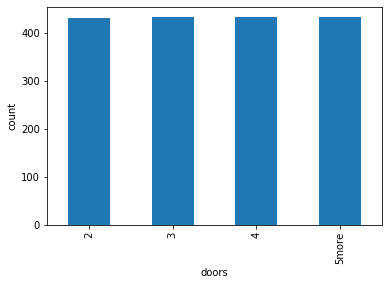

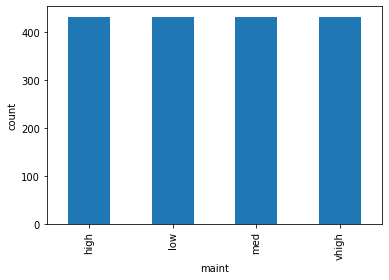

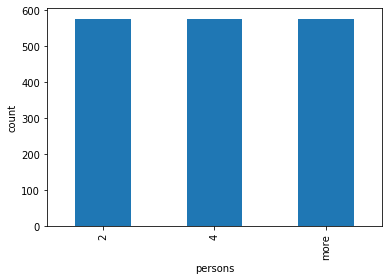

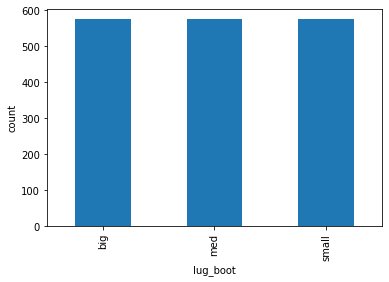

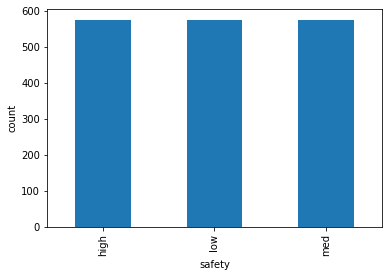

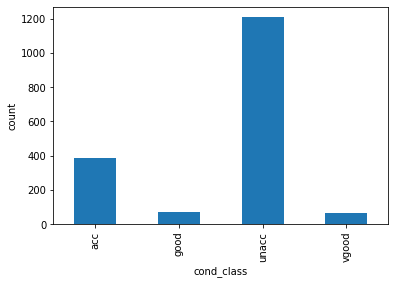

In [4]:
plt.title('Univariate Data Visualizations')
plt.ylabel('count')
car_data.groupby(['buying']).size().plot.bar()
plt.show()
plt.ylabel('count')
car_data.groupby(['doors']).size().plot.bar()
plt.show()
plt.ylabel('count')
car_data.groupby(['maint']).size().plot.bar()
plt.show()
plt.ylabel('count')
car_data.groupby(['persons']).size().plot.bar()
plt.show()
plt.ylabel('count')
car_data.groupby(['lug_boot']).size().plot.bar()
plt.show()
plt.ylabel('count')
car_data.groupby(['safety']).size().plot.bar()
plt.show()
plt.ylabel('count')
car_data.groupby(['cond_class']).size().plot.bar()
plt.show()

**From the above visualizations, we observed that there are some data anomalies in 'doors' and 'persons' columns, hence:**
> Replace "5more" string with 5 in 'doors' column <br>
> Replace "more" string with 6 value


In [5]:
car_data['doors'] = car_data['doors'].replace("5more",'5')
car_data['persons'] = car_data['persons'].replace("more",'6')

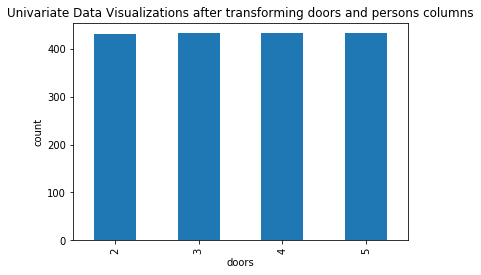

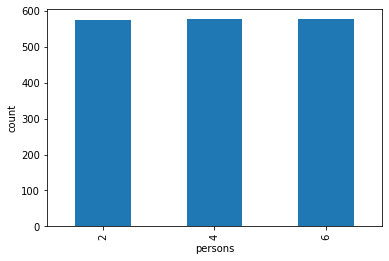

In [6]:
plt.title('Univariate Data Visualizations after transforming doors and persons columns')
plt.ylabel('count')
car_data.groupby(['doors']).size().plot.bar()
plt.show()
plt.ylabel('count')
car_data.groupby(['persons']).size().plot.bar()
plt.show()

### 3. Compare each column with output variable and visualize

In [7]:
car_data_buying = pd.crosstab(car_data.cond_class,car_data.buying)
car_data_maint = pd.crosstab(car_data.cond_class,car_data.maint)
car_data_doors = pd.crosstab(car_data.cond_class,car_data.doors)
car_data_persons = pd.crosstab(car_data.cond_class,car_data.persons)
car_data_lug_boot = pd.crosstab(car_data.cond_class,car_data.lug_boot)
car_data_safety = pd.crosstab(car_data.cond_class,car_data.safety)

Bivariate Data Visualizations


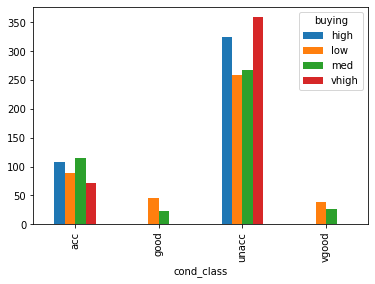

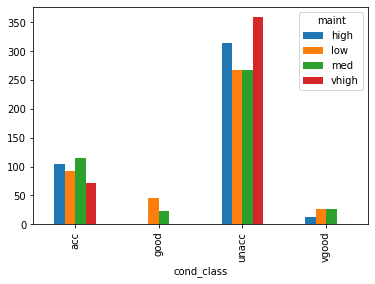

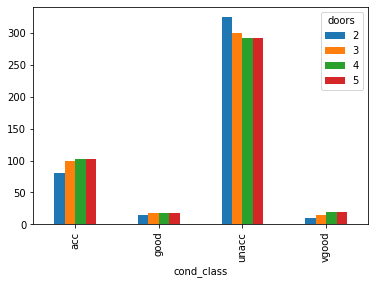

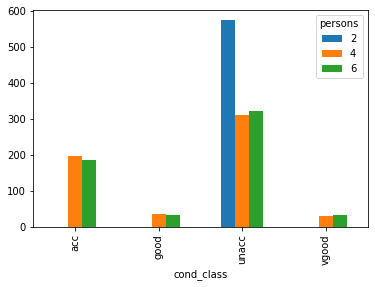

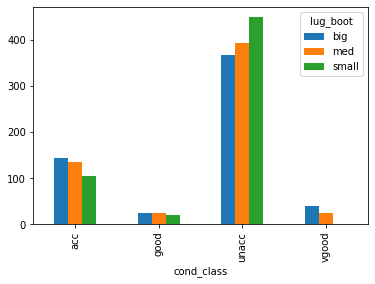

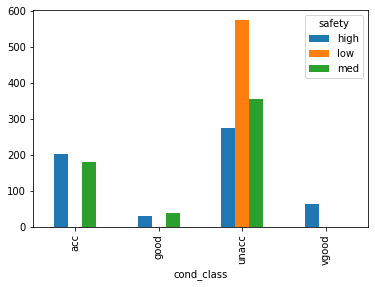

In [8]:
print("Bivariate Data Visualizations")
car_data_buying.plot.bar()
car_data_maint.plot.bar()
car_data_doors.plot.bar() 
car_data_persons.plot.bar() 
car_data_lug_boot.plot.bar()
car_data_safety.plot.bar()

#### Transform cond_class column into two classes only to prepare the data ready for logistic regression

In [9]:
### Visualize cond_class into two classes 

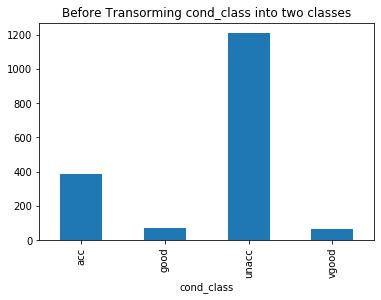

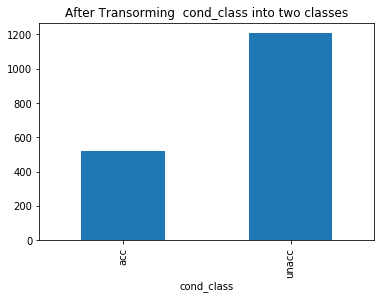

In [10]:
car_data.groupby(['cond_class']).size().plot.bar()
plt.title('Before Transorming cond_class into two classes')
plt.show()
car_data.loc[car_data['cond_class'] != 'unacc', 'cond_class'] = 'acc'
plt.title('After Transorming  cond_class into two classes')
car_data.groupby(['cond_class']).size().plot.bar()
plt.show()

In [11]:
car_data.apply(lambda car_data : pd.factorize(car_data)[0]).corr(method='pearson', min_periods=1)

,buying,maint,doors,persons,lug_boot,safety,cond_class
buying,1.000000,-0.001043,-0.001043,-0.000952,-0.000952,0.000952,0.204111
maint,-0.001043,1.000000,-0.001043,-0.000952,-0.000952,0.000952,0.181501
doors,-0.001043,-0.001043,1.000000,-0.000952,-0.000952,0.000952,0.061668
persons,-0.000952,-0.000952,-0.000952,1.000000,-0.000869,0.000869,0.392691
lug_boot,-0.000952,-0.000952,-0.000952,-0.000869,1.000000,0.000869,0.126460
safety,0.000952,0.000952,0.000952,0.000869,0.000869,1.000000,-0.338516
cond_class,0.204111,0.181501,0.061668,0.392691,0.126460,-0.338516,1.000000


In [12]:
car_data_new = pd.get_dummies(car_data)

In [13]:
car_data_new.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,persons_4,persons_6,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,cond_class_acc,cond_class_unacc
0,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,1
1,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
3,0,0,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1
4,0,0,0,1,0,0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


**Drop cond_class_unacc as we get the same information from cond_class_acc**

In [14]:
car_data_new = car_data_new.drop(['cond_class_unacc'],axis=1)

### 4. Visualize correlations on heat map

In [15]:
car_data_new_corr = car_data_new.corr()

Heatmap on correlations


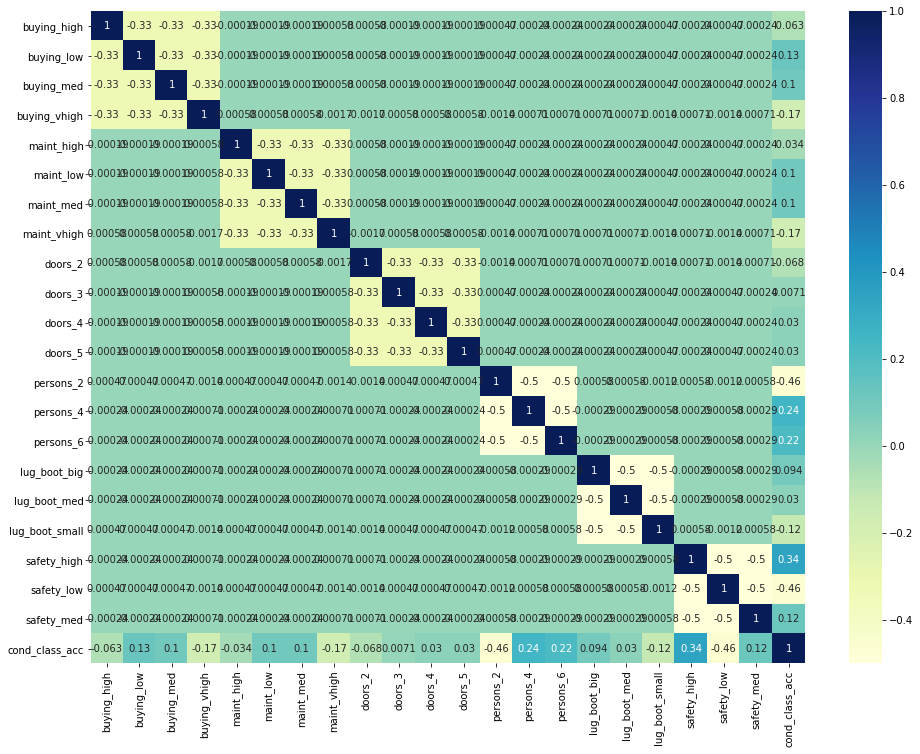

In [16]:
print('Heatmap on correlations')
plt.figure(figsize=(16, 12))
sns.heatmap(car_data_new_corr,annot=True,cmap="YlGnBu")
# sns.heatmap?

### Extract X as all columns except the last column and Y as last column

In [17]:
#Dividing the dataframe into x features and y target variable
x = car_data_new.iloc[:, :-1]
y = car_data_new.iloc[:, 21]

### 5. Train and test the data on Logistic regression with 10 fold cross validation

#### a) KFold cross validation approach: 
**KFold divides all the samples in  groups of samples, called folds, of equal sizes (if possible). The prediction function is**
**learned using  folds, and the fold left out is used for test.**

In [18]:
kfold = model_selection.KFold(n_splits=10)
model_kf = LogisticRegression(random_state = 0)
scores = cross_val_score(model_kf, x, y, scoring='accuracy', cv=kfold)

In [19]:
counter = 0
for i in scores:
    counter = counter + 1
    print("Fold:", counter, "Accuracy:%.3f" % i)

Fold: 1 Accuracy:0.936
Fold: 2 Accuracy:0.850
Fold: 3 Accuracy:0.855
Fold: 4 Accuracy:0.827
Fold: 5 Accuracy:0.925
Fold: 6 Accuracy:0.855
Fold: 7 Accuracy:0.960
Fold: 8 Accuracy:0.965
Fold: 9 Accuracy:0.965
Fold: 10 Accuracy:0.988


In [20]:
print('Mean of scores: %.3f' % mean(scores))
print('Standard deviation of scores: %.3f' % std(scores))

Mean of scores: 0.913
Standard deviation of scores: 0.057


#### Compute predictions, accuracy and confusion matrix

In [21]:
predictions_kf = cross_val_predict(model_kf, x, y, cv=kfold)
cm = confusion_matrix(y, predictions_kf)
precision, recall, fscore, support = score(y, predictions_kf, average='micro') 
print(fscore)
print(cm)
print(classification_report(y,predictions_kf)) 

0.9125651418645049
[[1147   62]
 [  89  429]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1209
           1       0.87      0.83      0.85       518

    accuracy                           0.91      1727
   macro avg       0.90      0.89      0.89      1727
weighted avg       0.91      0.91      0.91      1727



#### b) Stratified Kfold cross validation: 
StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set


In [22]:
skf = model_selection.StratifiedKFold(n_splits=10)
model_skf = LogisticRegression(random_state = 0)
scores_skf = cross_val_score(model_skf, x, y, scoring='accuracy', cv=skf)
# print("Cross-validated scores:", scores_skf)

In [23]:
counter = 0
for i in scores_skf:
    counter = counter + 1
    print("Fold:", counter, "Accuracy:%.3f" % i)

Fold: 1 Accuracy:0.803
Fold: 2 Accuracy:0.803
Fold: 3 Accuracy:0.971
Fold: 4 Accuracy:0.879
Fold: 5 Accuracy:0.936
Fold: 6 Accuracy:0.931
Fold: 7 Accuracy:0.884
Fold: 8 Accuracy:0.930
Fold: 9 Accuracy:0.988
Fold: 10 Accuracy:0.953


In [24]:
print('Mean of scores: %.3f' % mean(scores_skf))
print('Standard deviation of scores: %.3f' % std(scores_skf))

Mean of scores: 0.908
Standard deviation of scores: 0.061


#### Compute predictions, accuracy and confusion matrix

In [25]:
# Make cross validated predictions
predictions_skf = cross_val_predict(model_skf, x, y, cv=10)
cm = confusion_matrix(y, predictions_skf)
precision, recall, fscore, support = score(y, predictions_skf, average='micro') 
print(fscore)
print(cm)
print(classification_report(y,predictions_skf)) 

0.9079328314997105
[[1131   78]
 [  81  437]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1209
           1       0.85      0.84      0.85       518

    accuracy                           0.91      1727
   macro avg       0.89      0.89      0.89      1727
weighted avg       0.91      0.91      0.91      1727



**From the above, K-fold is slightly better than Stratified K-fold. Hence, taking predictions from K-fold approach**

In [26]:
car_data['prediction'] = predictions_kf
car_data.loc[car_data['prediction'] == 0, 'prediction'] = 'unacc'
car_data.loc[car_data['prediction'] == 1, 'prediction'] = 'acc'

In [27]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,cond_class,prediction
0,vhigh,vhigh,2,2,small,med,unacc,unacc
1,vhigh,vhigh,2,2,small,high,unacc,unacc
2,vhigh,vhigh,2,2,med,low,unacc,unacc
3,vhigh,vhigh,2,2,med,med,unacc,unacc
4,vhigh,vhigh,2,2,med,high,unacc,unacc


### 6. Create an output file with predictions

In [28]:
car_data.to_csv('car_data_out.csv',index=False)

In [29]:
car_data_out = pd.read_csv('car_data_out.csv',sep=',')
car_data_out.head()

,buying,maint,doors,persons,lug_boot,safety,cond_class,prediction
0,vhigh,vhigh,2,2,small,med,unacc,unacc
1,vhigh,vhigh,2,2,small,high,unacc,unacc
2,vhigh,vhigh,2,2,med,low,unacc,unacc
3,vhigh,vhigh,2,2,med,med,unacc,unacc
4,vhigh,vhigh,2,2,med,high,unacc,unacc
